In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'data/credit-score'

In [3]:
train_df = pd.read_csv(f'{DATA_DIR}/train.csv', low_memory=False)
test_df = pd.read_csv(f'{DATA_DIR}/test.csv')

In [4]:
train_df.shape, test_df.shape

((100000, 28), (50000, 27))

In [5]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
test_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [7]:
train_df.drop(
    columns=[
        'ID', 'Customer_ID', 'Month', 'SSN', 'Name', 
        'Occupation', 'Credit_Utilization_Ratio', 'Payment_Behaviour'
    ], 
    inplace=True
)

In [8]:
train_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

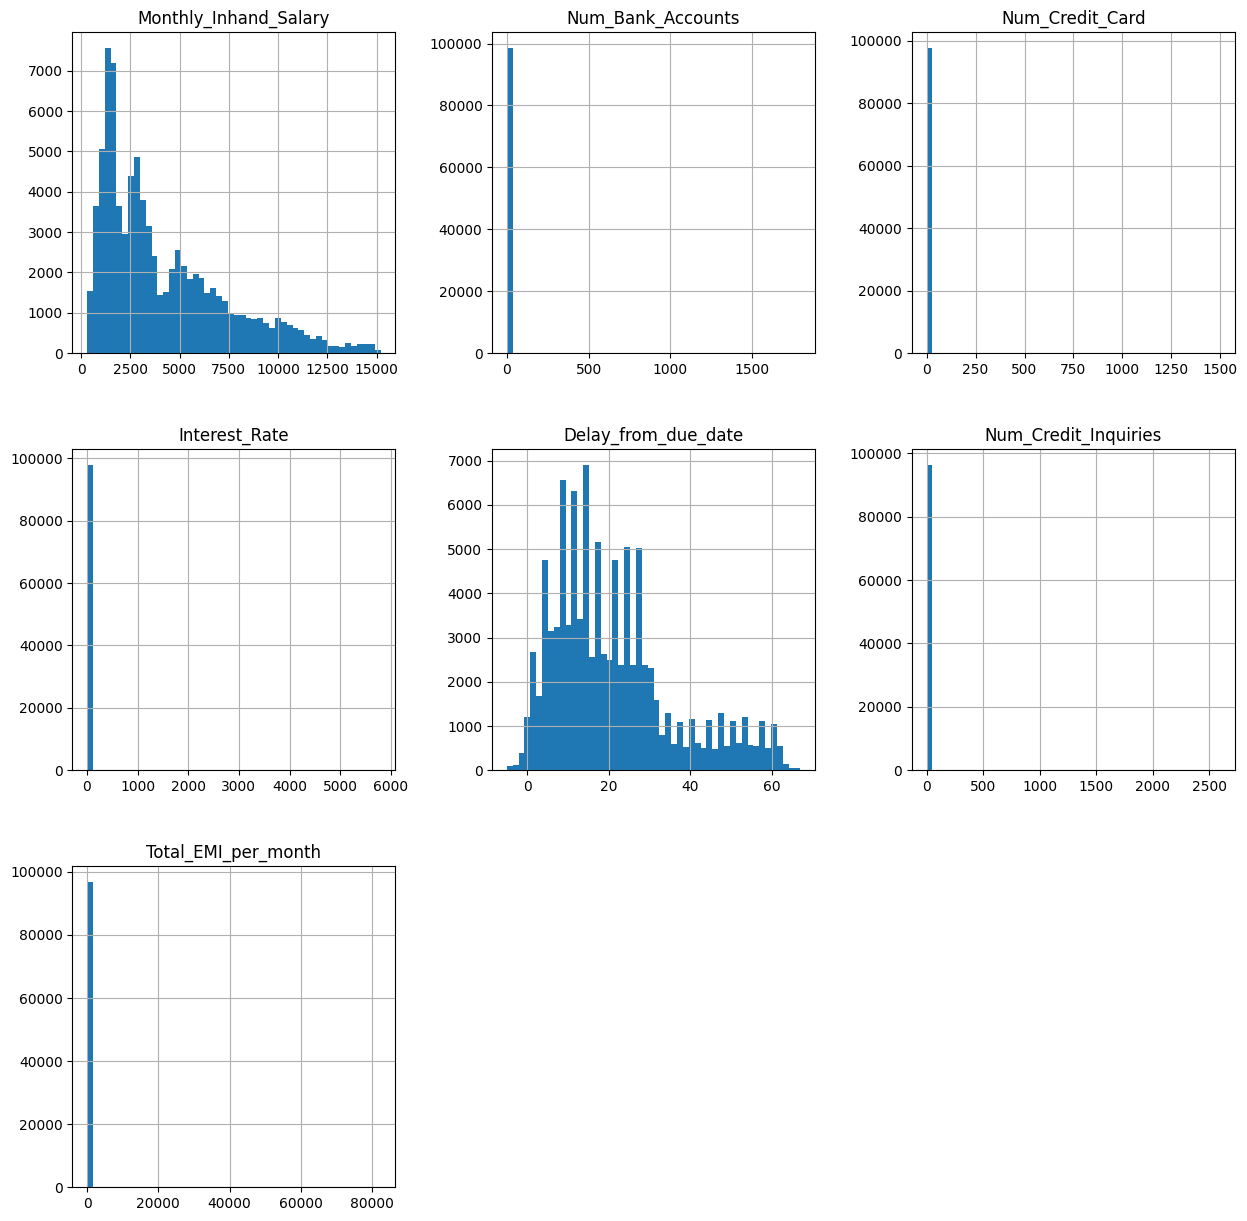

In [9]:
train_df.hist(bins=50, figsize=(15,15))
plt.show()

In [10]:
train_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,NaN,No,49.574949,118.28022162236736,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good


In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

for column in train_df.columns:
    if train_df[column].dtypes == 'object':
        train_df[column] = ordinal_encoder.fit_transform(train_df[column].values.reshape(-1,1))

In [13]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Credit_Score', axis=1).values
y = train_df['Credit_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
X_train.shape, X_test.shape

((90000, 19), (10000, 19))

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

mlp = HistGradientBoostingClassifier()
mlp.fit(X_train, y_train)
print(f'Train acc = {(accuracy_score(y_train, mlp.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, mlp.predict(X_test)) * 100.0):.2f}%')

Train acc = 77.10%
Test acc = 72.96%


In [24]:
preds = mlp.predict(X_test)

In [26]:
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0.0: 1890, 1.0: 2713, 2.0: 5397}